## __BRIEF 2__ : DATASET & DATAVIZ
#### __*Alexis Rémi Yasemin*__ - Les Milliardaires

____________________________________________________________________________

## Import des librairies

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import du Dataset
#### *Disponible sur Kaggle* : https://www.kaggle.com/datasets/salimwid/global-billionaire-wealth-and-sources-2002-2023

In [49]:
data = pd.read_csv("Data/billionaire_list_20yrs.csv")
data.head()

,Unnamed: 0,name,last_name,age,gender,time,permanent_country,company,main_industry,wealth_source_details,industry,state,headquarters,countries,annual_income,daily_income,birth_year,name_cleaned
0,675,Abdulla bin Ahmad Al Ghurair,Al Ghurair,67,M,2013,United Arab Emirates-Dubai,Mashreq Bank,Diversified,diversified,Diversified;Banking,NaN,NaN,are,95604000,261928,1955,abdulla_bin_ahmad_al_ghurair
1,676,Abdulla bin Ahmad Al Ghurair,Al Ghurair,67,M,2013,United Arab Emirates-Dubai,Mashreq Bank,Diversified,diversified,Diversified;Banking,NaN,NaN,are,95604000,399254,1955,abdulla_bin_ahmad_al_ghurair
2,677,Abdulla bin Ahmad Al Ghurair,Al Ghurair,67,M,2013,United Arab Emirates-Dubai,Mashreq Bank,Diversified,diversified,Diversified;Banking,NaN,NaN,are,95604000,536021,1955,abdulla_bin_ahmad_al_ghurair
3,678,Abdulla bin Ahmad Al Ghurair,Al Ghurair,67,M,2013,United Arab Emirates-Dubai,Mashreq Bank,Diversified,diversified,Diversified;Banking,NaN,NaN,are,95604000,410391,1955,abdulla_bin_ahmad_al_ghurair
4,679,Abdulla bin Ahmad Al Ghurair,Al Ghurair,67,M,2013,United Arab Emirates-Dubai,Mashreq Bank,Diversified,diversified,Diversified;Banking,NaN,NaN,are,95604000,558904,1955,abdulla_bin_ahmad_al_ghurair


#### Informations générales sur le Dataset

In [50]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352369 entries, 0 to 352368
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Unnamed: 0             352369 non-null  int64 
 1   name                   352369 non-null  object
 2   last_name              341519 non-null  object
 3   age                    352369 non-null  int64 
 4   gender                 340477 non-null  object
 5   time                   352369 non-null  int64 
 6   permanent_country      304678 non-null  object
 7   company                326869 non-null  object
 8   main_industry          352369 non-null  object
 9   wealth_source_details  341447 non-null  object
 10  industry               352320 non-null  object
 11  state                  159190 non-null  object
 12  headquarters           133655 non-null  object
 13  countries              352369 non-null  object
 14  annual_income          352369 non-null  int64 
 15  

,Unnamed: 0,age,time,annual_income,daily_income,birth_year
count,352369.000000,352369.000000,352369.000000,3.523690e+05,3.523690e+05,352369.000000
mean,179156.890498,72.130326,2014.227824,1.437315e+08,3.937844e+05,1949.869674
std,103374.859481,13.237945,5.474610,2.336920e+08,6.402521e+05,13.237945
min,0.000000,19.000000,2002.000000,1.681350e+07,4.606400e+04,1905.000000
25%,89515.000000,63.000000,2010.000000,4.870500e+07,1.334380e+05,1941.000000
50%,178702.000000,72.000000,2015.000000,7.642500e+07,2.093830e+05,1950.000000
75%,268734.000000,81.000000,2019.000000,1.396560e+08,3.826190e+05,1959.000000
max,358317.000000,117.000000,2022.000000,5.650200e+09,1.548000e+07,2003.000000


In [51]:
#Shape du dataset avant nettoyage
data.shape

(352369, 18)

## Nettoyage du Dataset

#### *Step 1* : Suppression des doublons et colonnes inutiles

In [52]:
# On supprime ici les éléments dupliqués (à cause du revenu journalier, de nombreux noms
# apparaissent plusieurs fois)
data.drop_duplicates(['name','annual_income'], inplace=True)

# Age
data.age = 2023 - data.birth_year

# Suppression des colonnes avec les informations redondantes
# "name_cleaned" took care of removing "," and "()"
display(data[['name','last_name','name_cleaned']].sample(5))  

data.drop(['name','last_name'], axis=1, inplace=True)
# make name pretty
data.name_cleaned = data.name_cleaned.apply(lambda x: x.replace("-"," ").capitalize()) 

# Suppression des colonnes qui ne sont plus nécessaires
data.drop(['company','wealth_source_details','industry','state','headquarters','daily_income','birth_year'], axis=1, inplace=True)
data.info()

# Mettre l'argent en billion de dollars
data.annual_income /= 1e9

,name,last_name,name_cleaned
135495,Ilkka Herlin,Herlin,ilkka_herlin
343589,Yang Jianliang,Yang,yang_jianliang
162179,John Malone,Malone,john_malone
315579,Thomas Secunda,Secunda,thomas_secunda
120485,Hans Langer,Langer,hans_langer


<class 'pandas.core.frame.DataFrame'>
Index: 30912 entries, 0 to 352352
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         30912 non-null  int64 
 1   age                30912 non-null  int64 
 2   gender             28112 non-null  object
 3   time               30912 non-null  int64 
 4   permanent_country  25428 non-null  object
 5   main_industry      30912 non-null  object
 6   countries          30912 non-null  object
 7   annual_income      30912 non-null  int64 
 8   name_cleaned       30912 non-null  object
dtypes: int64(4), object(5)
memory usage: 2.4+ MB


In [53]:
# Imputer les valeurs de genre par defaut 'M;F' aux valeurs manquantes
data.loc[data.gender.isnull(),'gender'] = 'M;F'

#### *Step 2* : Les valeurs nulles

In [54]:
# Quelle est la proportion de valeurs nulles ?
print("Vérifier la proportion de valeurs nulles :")

# On a remarqué que country "nan" était une string alors on remplace par une valeur nulle
data.loc[data.permanent_country == 'nan','countries'] = np.NaN
for col in data.columns:
    print(f"{col} has {round(100*data[col].isnull().sum()/data[col].count())} % valeurs nulles")

Vérifier la proportion de valeurs nulles :
Unnamed: 0 has 0 % valeurs nulles
age has 0 % valeurs nulles
gender has 0 % valeurs nulles
time has 0 % valeurs nulles
permanent_country has 22 % valeurs nulles
main_industry has 0 % valeurs nulles
countries has 0 % valeurs nulles
annual_income has 0 % valeurs nulles
name_cleaned has 0 % valeurs nulles


In [55]:
## Attribuer les pays là où il y a des valeurs manquantes

# Réinitialisation des codes pays avec le dernier element de la liste séparé par ';'
data['.countries'] = data.countries.apply(lambda x: str(x).split(";")[0])

# Réinitialisation des noms de pays avec le premier élément de la liste séparé par '-'
data.permanent_country = data.permanent_country.apply(lambda x: str(x).split("-")[0])

#### *Step 3* : Réatribution de valeurs

In [56]:
# Construction d'un dictionnaire des noms de pays en fonction des codes pays
country_dict = {}
for name,code in zip(data.permanent_country, data['.countries']):
    if name != 'nan':
        country_dict[code] = name

display(country_dict)

{'are': 'United Arab Emirates',
 'chn': 'China',
 'ita': 'Italy',
 'mex': 'Mexico',
 'usa': 'United States',
 'fra': 'France',
 'gbr': 'United Kingdom',
 'ind': 'India',
 'deu': 'Germany',
 'arg': 'Mexico',
 'che': 'Switzerland',
 'tha': 'Thailand',
 'bra': 'Brazil',
 'chl': 'Chile',
 'nor': 'Norway',
 'jpn': 'Japan',
 'irl': 'United States',
 'nld': 'Netherlands',
 'idn': 'Indonesia',
 'mys': 'Malaysia',
 'kor': 'South Korea',
 'aus': 'Melbourne',
 'sgp': 'China',
 'mar': 'Morocco',
 'rus': 'Russia',
 'mco': 'Monaco',
 'sau': 'Saudi Arabia',
 'nga': 'Nigeria',
 'isr': 'Israel',
 'dnk': 'Denmark',
 'tur': 'Turkey',
 'can': 'China',
 'esp': 'Spain',
 'kaz': 'Kazakhstan',
 'prt': 'Portugal',
 'per': 'Peru',
 'cze': 'Czech Republic',
 'phl': 'Philippines',
 'swe': 'Sweden',
 'fin': 'Finland',
 'grc': 'Brazil',
 'lbn': 'Lebanon',
 'bel': 'Kazakhstan',
 'kwt': 'Kuwait',
 'geo': 'Kazakhstan',
 'npl': 'Nepal',
 'col': 'Colombia',
 'zaf': 'South Africa',
 'lie': 'Liechtenstein',
 'nzl': 'Singa

In [57]:
## Nettoyage manuel pour le reste de la colonne "permanent_country"

# On ne garde que le premier terme avant "-"
data.permanent_country = data.permanent_country.apply(lambda x : str(x).split('-')[0])

data.loc[(data.permanent_country == 'nan')&(data.countries == 'usa'), 'permanent_country'] = 'United States'
data.loc[data.permanent_country == 'USA', 'permanent_country'] = 'United States'

data.loc[(data.permanent_country == 'nan')&(data.countries == 'fra'), 'permanent_country'] = 'France'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'aus'), 'permanent_country'] = 'Australia'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'esp'), 'permanent_country'] = 'Espagne'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'ind'), 'permanent_country'] = 'India'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'deu'), 'permanent_country'] = 'Germany'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'prt'), 'permanent_country'] = 'Portugal'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'rus'), 'permanent_country'] = 'Russia'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'kor'), 'permanent_country'] = 'Korea'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'can'), 'permanent_country'] = 'Canada'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'jpn'), 'permanent_country'] = 'Japan'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'tur'), 'permanent_country'] = 'Turkey'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'ita'), 'permanent_country'] = 'Italy'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'gbr'), 'permanent_country'] = 'Great Britain'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'bra'), 'permanent_country'] = 'Brazil'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'sgp'), 'permanent_country'] = 'Singapor'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'pol'), 'permanent_country'] = 'Poland'
data.loc[(data.permanent_country == 'nan')&(data.countries.str.startswith('chn')), 'permanent_country'] = 'China'

In [58]:
# On verifie par le biais d'un échantillon, que les valeurs ont bien été réatribuées

data[['permanent_country','countries']].sample(20)

,permanent_country,countries
58203,China,chn;hkg
72123,United States,usa
174564,Japan,jpn
303174,China,chn
72592,United States,usa
186929,Singapor,sgp
339746,United States,usa
269713,China,chn;mys;hkg
266645,United States,usa
62995,Germany,deu


## Dataset Nettoyé sur lequel va être effectué la dataviz

In [59]:
# Une fois le nettoyage effectué, notre dataset va ressembler à ça : 
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30912 entries, 0 to 352352
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         30912 non-null  int64  
 1   age                30912 non-null  int64  
 2   gender             30912 non-null  object 
 3   time               30912 non-null  int64  
 4   permanent_country  30912 non-null  object 
 5   main_industry      30912 non-null  object 
 6   countries          30912 non-null  object 
 7   annual_income      30912 non-null  float64
 8   name_cleaned       30912 non-null  object 
 9   .countries         30912 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 2.6+ MB


In [60]:
# Et il aura maintenant le shape suivant : 
data.shape

(30912, 10)

## **EXPLORATION DE LA DATA**
##### *Pour l'ensemble des explorations, nous avons trouvé judicieux d'effectuer des analyses sur l'année la plus récente (ici 2022), puis de les comparer avec les années antérieures, à savoir 2012, puis 2002.*

### ____ **LES PAYS** ____

#### **--> DANS QUELS PAYS VIVAIENT PRINCIPALEMENT LES MILLIARDAIRES EN 2022 ?**

In [61]:
data_2022 = data[data["time"] == 2022]
top_countries_2022 = data_2022["permanent_country"].value_counts().head(10)
top_countries_2022

permanent_country
China             1016
United States      790
India              212
Germany            122
Switzerland         91
United Kingdom      82
Russia              72
China               69
France              68
Brazil              67
Name: count, dtype: int64

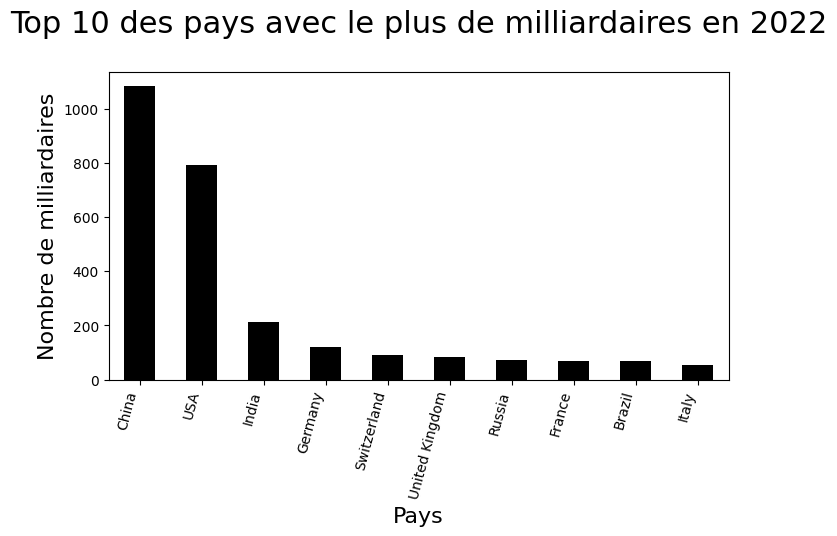

In [62]:
#Suite à un problème d'affichage:
#Suppression des espaces
#Suppression des doublons USA / UNITED STATES en remplaçant l'un par l'autre
data["permanent_country"] = data["permanent_country"].str.strip() 
data["permanent_country"].replace({"United States": "USA"}, inplace=True)

data_2022 = data[data["time"] == 2022]
ax = top_countries_2022 = data_2022["permanent_country"].value_counts().head(10)

#GRAPH
plt.figure(figsize=(8, 4))
ax = top_countries_2022.plot(kind="bar", color="black")
plt.title("Top 10 des pays avec le plus de milliardaires en 2022", size=22, y=1.1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=75, ha="right")
plt.xlabel("Pays", size=16)
plt.ylabel("Nombre de milliardaires", size=16)

plt.show()

#### **--> QUE PEUT-ON DIRE EN TERMES D'EVOLUTION ?**

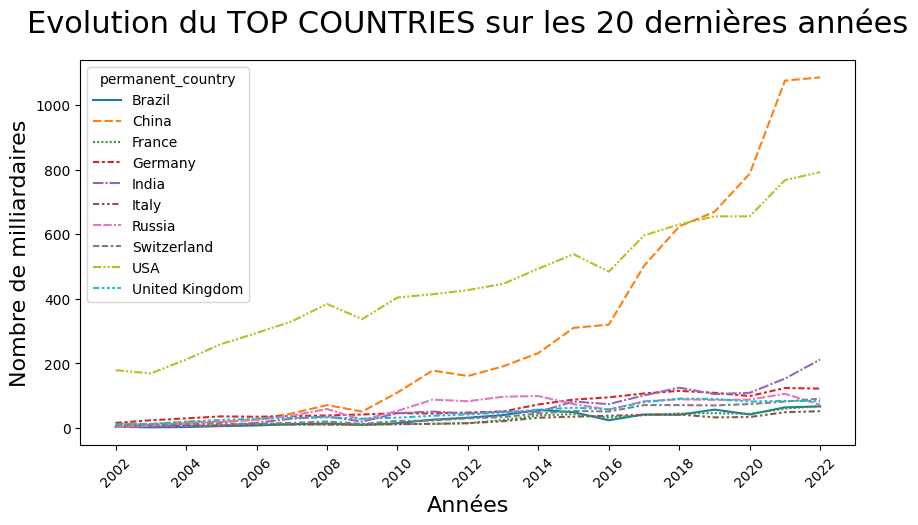

In [63]:
import matplotlib.ticker as ticker

# On effectue un loc afin de suivre l'évolution de 2002 à 2022 sur les pays "TOP 10"
to_plot = data.loc[data.permanent_country.isin(top_countries_2022.index),["time","permanent_country","name_cleaned"]]
to_plot = to_plot.pivot_table(index="time", values="name_cleaned", columns="permanent_country", aggfunc="count")

plt.figure(figsize=(10, 5))
sns.lineplot(data = to_plot)

plt.title("Evolution du TOP COUNTRIES sur les 20 dernières années", size=22, y=1.05)
plt.xlabel("Années", size=16)
plt.ylabel("Nombre de milliardaires", size = 16)

# Code pour formatter l'axe des abscisses
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(2))
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.xticks(rotation=45)

plt.show()

##### *On reprend ici le même graphique, sans les USA et la Chine, afin d'avoir plus de visibilité sur l'évolution des 8 autres pays*

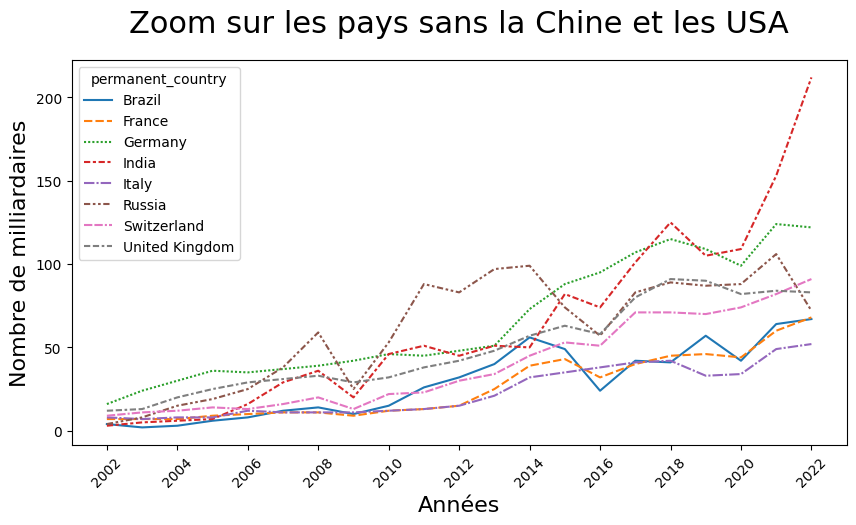

In [64]:
import matplotlib.ticker as ticker

to_plot = data.loc[data.permanent_country.isin(top_countries_2022.index[2:]),["time","permanent_country","name_cleaned"]]
to_plot = to_plot.pivot_table(index="time", values="name_cleaned", columns="permanent_country", aggfunc="count")

plt.figure(figsize=(10, 5))
sns.lineplot(data = to_plot)

plt.title("Zoom sur les pays sans la Chine et les USA", size=22, y=1.05)
plt.xlabel("Années", size=16)
plt.ylabel("Nombre de milliardaires", size = 16)

# Code pour formatter l'axe des abscisses
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(2))
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.xticks(rotation=45)

plt.show()

### ____ **LES PROPORTIONS HOMMES / FEMMES** ____

#### **--> COMMENT EVOLUE LA PROPORTION H/F AU FIL DES ANNEES?**

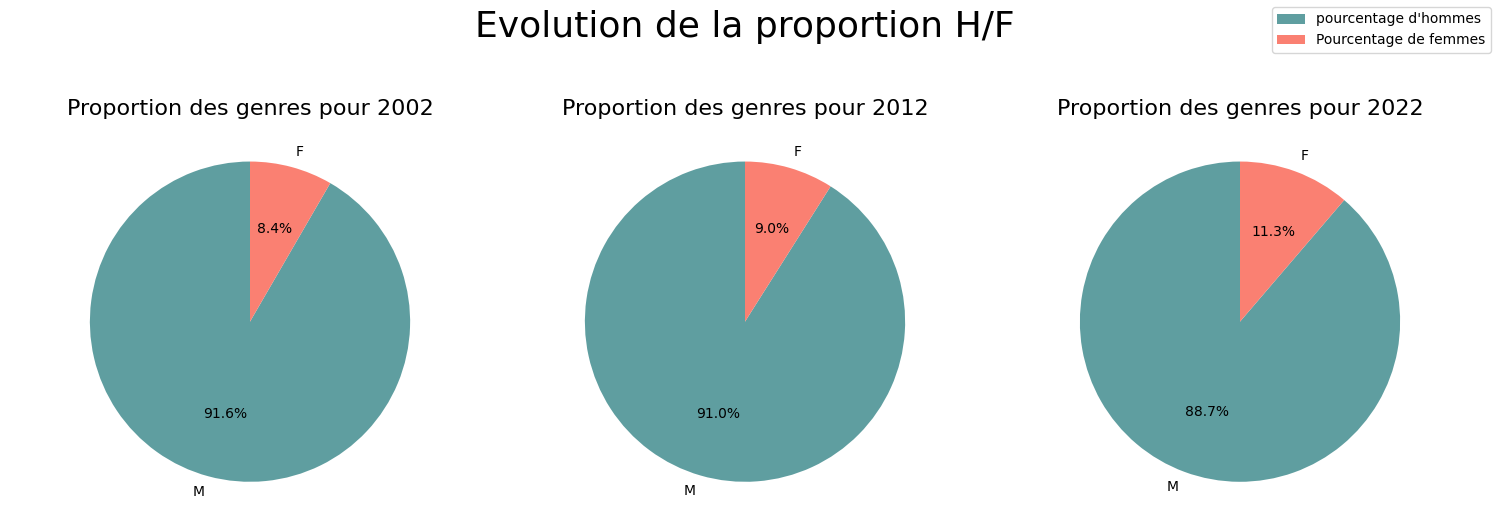

In [65]:
years = [2002, 2012, 2022]
colors = ["cadetblue", "salmon"]
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# On effectue une boucle afin d'obtenir un graphique pour les 3 années 
for i, year in enumerate(years):
    
    data_filtered = data.loc[data["time"] == year]
    data_filtered = data_filtered[data_filtered["gender"].isin(["F", "M"])]

    proportions = data_filtered["gender"].value_counts(normalize=True)

    axes[i].pie(proportions, labels=proportions.index, autopct="%1.1f%%", startangle=90, colors=colors)
    axes[i].axis("equal")
    axes[i].set_title(f"Proportion des genres pour {year}", size=16)

fig.suptitle("Evolution de la proportion H/F", fontsize=26, y=1.05)
fig.legend(["pourcentage d'hommes", "Pourcentage de femmes"], loc="upper right")

plt.tight_layout()
plt.show()

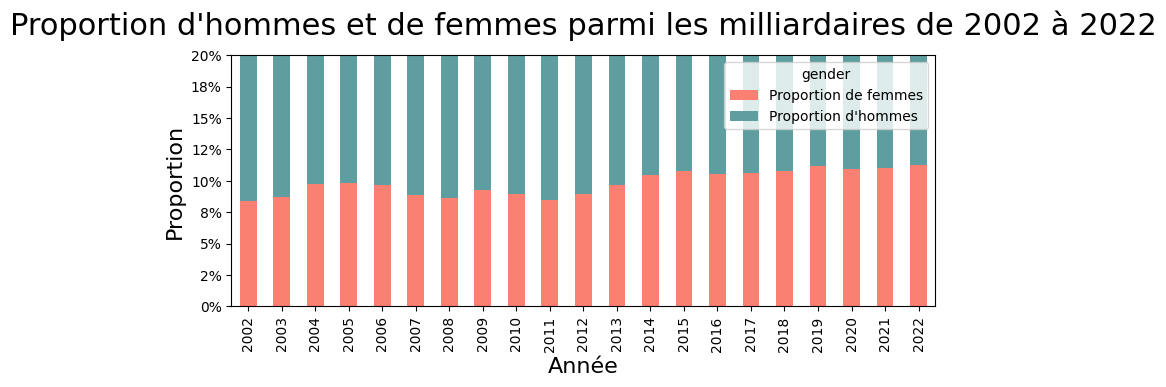

In [66]:

import matplotlib.ticker as mtick

#Attention, ne pas oublier la condition pour exclure les inputs "M;F" sinon le graphique est faux
data_years = data[(data["time"] >= 2002) & (data["time"] <= 2022) & (data["gender"] != "M;F")]
grouped_data = data_years.groupby(["time", "gender"]).size().unstack()

grouped_data["Total"] = grouped_data.sum(axis=1)
grouped_data["Proportion de femmes"] = grouped_data["F"] / grouped_data["Total"]
grouped_data["Proportion d'hommes"] = grouped_data["M"] / grouped_data["Total"]

ax = grouped_data[["Proportion de femmes", "Proportion d'hommes"]].sort_index()\
    .plot(kind="bar", stacked=True, figsize=(8, 4), color=["salmon", "cadetblue"])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

plt.title("Proportion d\'hommes et de femmes parmi les milliardaires de 2002 à 2022", size=22, y=1.05)
plt.xlabel("Année", size=16)
plt.ylabel("Proportion", size=16)
plt.ylim((0, 0.2))

plt.tight_layout()
plt.show()

### ____ **LES INDUSTRIES** ____

#### **--> COMMENT EVOLUE LE CA DES MILLIARDAIRES PAR TYPE D'ENTREPRISE?**

In [67]:
# récupération des data de 2022
data_2022 = data[data.time == 2022]

In [68]:
top_ten_income_2022 = data_2022.pivot_table(index='main_industry', values='annual_income', aggfunc='sum').sort_values(by='annual_income', ascending=False)[:10]
top_ten_income_2022

,annual_income
main_industry,
Technology,55.98342
Finance & Investments,44.47404
Fashion & Retail,41.44770
Manufacturing,27.79950
Diversified,24.15654
Food & Beverage,23.59539
Real Estate,19.05072
Healthcare,18.48054
Automotive,14.75502


In [69]:
bar_height = top_ten_income_2022.annual_income.values
bar_names = top_ten_income_2022.index.values
print(bar_height)
print(bar_names)

[55.98342 44.47404 41.4477  27.7995  24.15654 23.59539 19.05072 18.48054
 14.75502 12.70908]
['Technology' 'Finance & Investments' 'Fashion & Retail' 'Manufacturing'
 'Diversified' 'Food & Beverage' 'Real Estate' 'Healthcare' 'Automotive'
 'Media & Entertainment']


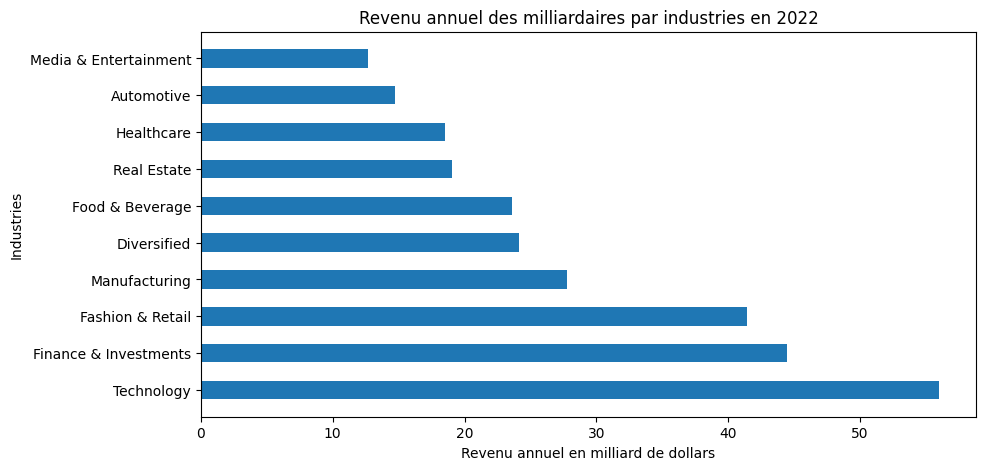

In [70]:
fig, ax = plt.subplots(figsize=(10,5))

ax.barh(bar_names, bar_height, 0.5)
ax.set_xlabel('Revenu annuel en milliard de dollars')
ax.set_ylabel('Industries')
ax.set_title("Revenu annuel des milliardaires par industries en 2022")
plt.show()

# Evolution du TOP 10 des industries de 2022 depuis 2002

In [71]:
# récupération du TOP 10 de 2022
top10_industry = top_ten_income_2022.index.values[:10]
top10_industry

array(['Technology', 'Finance & Investments', 'Fashion & Retail',
       'Manufacturing', 'Diversified', 'Food & Beverage', 'Real Estate',
       'Healthcare', 'Automotive', 'Media & Entertainment'], dtype=object)

In [72]:
df_top10_industry = data[data['main_industry'].isin(top10_industry)]
df_top10_industry

,Unnamed: 0,age,gender,time,permanent_country,main_industry,countries,annual_income,name_cleaned,.countries
0,675,68,M,2013,United Arab Emirates,Diversified,are,0.095604,Abdulla_bin_ahmad_al_ghurair,are
10,685,68,M,2014,United Arab Emirates,Diversified,are,0.145728,Abdulla_bin_ahmad_al_ghurair,are
20,695,68,M,2015,United Arab Emirates,Diversified,are,0.195648,Abdulla_bin_ahmad_al_ghurair,are
30,705,68,M,2016,United Arab Emirates,Diversified,are,0.149793,Abdulla_bin_ahmad_al_ghurair,are
40,715,68,M,2017,United Arab Emirates,Diversified,are,0.204000,Abdulla_bin_ahmad_al_ghurair,are
...,...,...,...,...,...,...,...,...,...,...
352284,358233,66,M,2018,Poland,Media & Entertainment,pol,0.080220,Zygmunt_solorz_zak,pol
352301,358250,66,M,2019,Poland,Media & Entertainment,pol,0.075735,Zygmunt_solorz_zak,pol
352318,358267,66,M,2020,Poland,Media & Entertainment,pol,0.066024,Zygmunt_solorz_zak,pol
352335,358284,66,M,2021,Poland,Media & Entertainment,pol,0.084480,Zygmunt_solorz_zak,pol


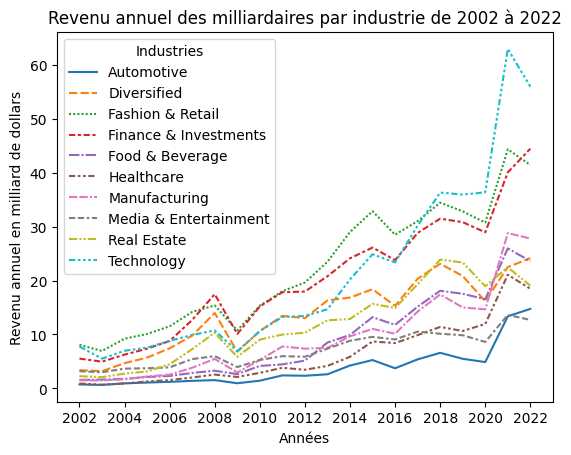

In [73]:
total_income = df_top10_industry.pivot_table(index='time', values='annual_income', columns='main_industry', aggfunc='sum')
ax = sns.lineplot(total_income)
plt.title('Revenu annuel des milliardaires par industrie de 2002 à 2022')
plt.legend(title= 'Industries')
ax.set_xlabel('Années')
ax.set_ylabel('Revenu annuel en milliard de dollars')
plt.xticks(ticks=range(2002,2023,2))
plt.show()

### Filtres industries les plus representées sur toutes les années

In [74]:
main_industries = data.main_industry.value_counts()[:10].index
filtre_main_industries = data.main_industry.isin(top10_industry)

In [75]:
data_to_use = data[filtre_main_industries]
count_person_industry = data_to_use.pivot_table(index='main_industry', values='name_cleaned', columns='time', aggfunc='count')

In [76]:
count_person_industry_2022 = count_person_industry.loc[:,2022].sort_values(ascending=False)
count_person_industry_2022

main_industry
Finance & Investments    390
Technology               338
Manufacturing            331
Fashion & Retail         247
Healthcare               219
Real Estate              219
Food & Beverage          198
Diversified              178
Media & Entertainment     97
Automotive                67
Name: 2022, dtype: int64

In [77]:
bar_names = count_person_industry_2022.index.values
bar_height = count_person_industry_2022.values

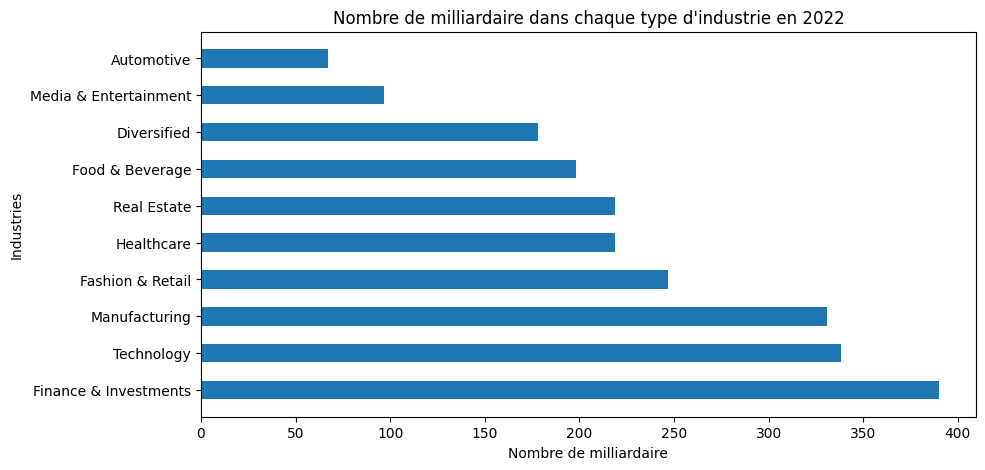

In [78]:
fig, ax = plt.subplots(figsize=(10,5))

ax.barh(bar_names, bar_height, 0.5)
ax.set_xlabel('Nombre de milliardaire')
ax.set_ylabel('Industries')
ax.set_title("Nombre de milliardaire dans chaque type d\'industrie en 2022")
plt.show()

In [79]:
total_person_by_industry = df_top10_industry.pivot_table(index='time', values='name_cleaned', columns='main_industry', aggfunc='count')
total_person_by_industry

main_industry,Automotive,Diversified,Fashion & Retail,Finance & Investments,Food & Beverage,Healthcare,Manufacturing,Media & Entertainment,Real Estate,Technology
time,,,,,,,,,,
2002,1,29,41,43,12,8,12,27,21,31
2003,4,29,39,41,14,7,12,25,19,27
2004,4,37,51,49,16,9,16,34,28,36
2005,7,42,53,71,21,15,25,39,34,39
2006,8,52,63,84,23,18,30,41,49,45
2007,9,62,72,103,30,20,42,45,63,53
2008,10,73,83,146,29,25,51,46,80,62
2009,9,55,68,105,31,23,37,43,67,49
2010,13,80,89,148,40,32,58,49,94,70


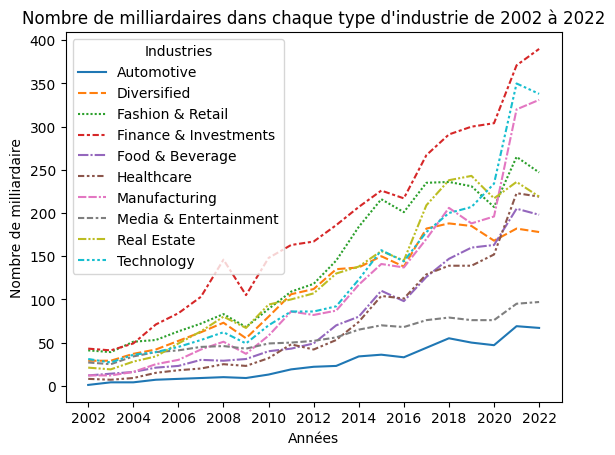

In [80]:
ax2 = sns.lineplot(total_person_by_industry)
plt.title('Nombre de milliardaires dans chaque type d\'industrie de 2002 à 2022')
plt.legend(title= 'Industries')
ax2.set_xlabel('Années')
ax2.set_ylabel('Nombre de milliardaire')
plt.xticks(ticks=range(2002,2023,2))
plt.show()

In [81]:
df_top10_industry_2022 = df_top10_industry[df_top10_industry.time == 2022]
mean_age_by_industry_2022 = df_top10_industry_2022.pivot_table(index='main_industry', values='age', aggfunc='median').sort_values(by='age', ascending=False)
mean_age_by_industry_2022

,age
main_industry,
Fashion & Retail,71.0
Diversified,69.0
Food & Beverage,68.0
Real Estate,68.0
Finance & Investments,65.0
Automotive,64.0
Healthcare,63.0
Media & Entertainment,63.0
Manufacturing,62.0


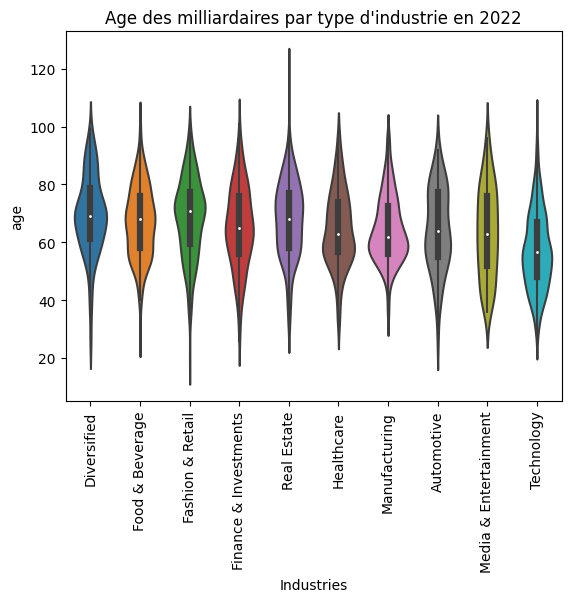

In [82]:
ax3 = sns.violinplot(df_top10_industry_2022, x='main_industry',y='age')
plt.xticks(rotation= 90)
ax3.set_title("Age des milliardaires par type d'industrie en 2022")
ax3.set_xlabel('Industries')
plt.show()

In [83]:
df_top10_industry_2012 = df_top10_industry[df_top10_industry.time == 2012]
df_top10_industry_2012

,Unnamed: 0,age,gender,time,permanent_country,main_industry,countries,annual_income,name_cleaned,.countries
1199,118347,70,M,2012,USA,Fashion & Retail,usa,0.15288,Hank_doug_meijer,usa
1549,132671,73,M,2012,United Kingdom,Real Estate,gbr,0.09360,Ian_richard_livingstone,gbr
4483,319603,72,M,2012,China,Real Estate,chn;hkg,0.57096,Thomas_raymond_kwok,chn
5185,164,92,M,2012,USA,Media & Entertainment,usa,0.07176,A_jerrold_perenchio,usa
5744,1256,61,F,2012,USA,Finance & Investments,usa,0.32136,Abigail_johnson,usa
...,...,...,...,...,...,...,...,...,...,...
350510,356382,65,M,2012,China,Real Estate,sgp;chn,0.04368,Zhong_sheng_jian,sgp
351248,357166,65,M,2012,China,Manufacturing,chn,0.06552,Zhu_gongshan,chn
351599,357534,58,M,2012,China,Diversified,chn,0.05616,Zhu_yicai,chn
351806,357754,77,M,2012,China,Food & Beverage,chn,0.20280,Zong_qinghou,chn


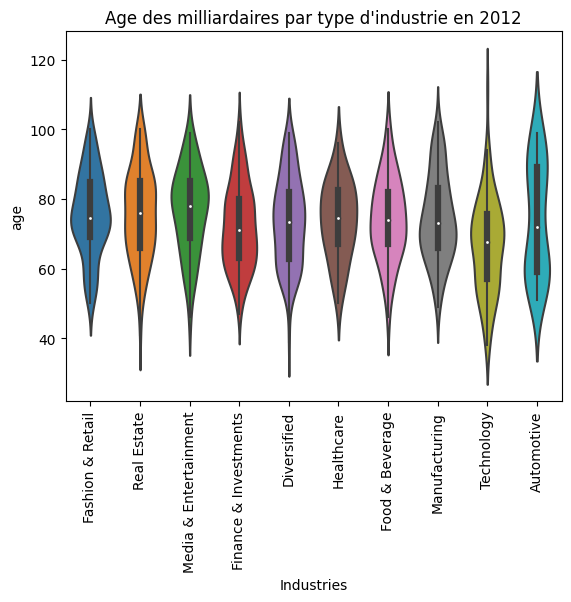

In [84]:
ax5 = sns.violinplot(df_top10_industry_2012, x='main_industry',y='age')
plt.xticks(rotation= 90)
ax5.set_title("Age des milliardaires par type d'industrie en 2012")
ax5.set_xlabel('Industries')
plt.show()

In [85]:
df_top10_industry_2002 = df_top10_industry[df_top10_industry.time == 2002]
df_top10_industry_2002

,Unnamed: 0,age,gender,time,permanent_country,main_industry,countries,annual_income,name_cleaned,.countries
4313,319433,72,M,2002,China,Real Estate,chn;hkg,0.369012,Thomas_raymond_kwok,chn
5025,4,92,M,2002,USA,Media & Entertainment,usa,0.104286,A_jerrold_perenchio,usa
5534,1046,61,F,2002,USA,Finance & Investments,usa,0.344946,Abigail_johnson,usa
5975,1487,86,M,2002,Brazil,Fashion & Retail,bra,0.044121,Abilio_dos_santos_diniz,bra
8030,3567,86,M,2002,Japan,Real Estate,jpn,0.136374,Akira_mori,jpn
...,...,...,...,...,...,...,...,...,...,...
334116,339519,94,M,2002,Singapore,Finance & Investments,sgp,0.048132,Wee_cho_yaw,sgp
338469,343973,59,M,2002,USA,Food & Beverage,usa,0.136374,William_wrigley_jr,usa
344544,350228,93,M,2002,nan,Diversified,mys,0.040110,Yeoh_tiong_lay,mys
346930,352685,35,M,2002,USA,Finance & Investments,usa,0.060165,Zach_perret,usa


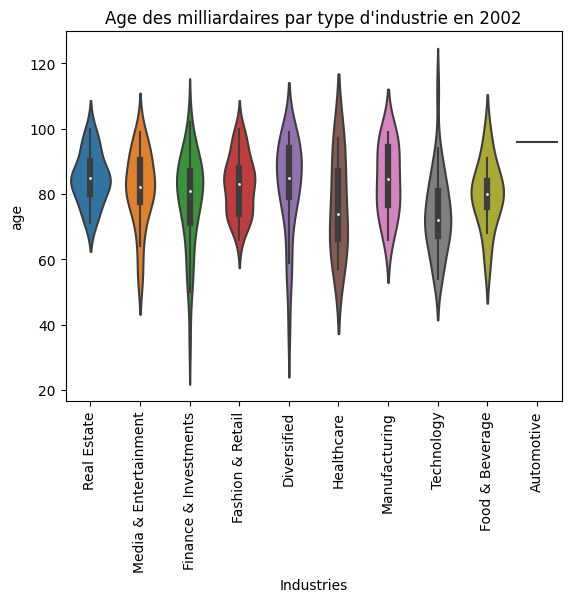

In [86]:
ax6 = sns.violinplot(df_top10_industry_2002, x='main_industry',y='age')
plt.xticks(rotation= 90)
ax6.set_title("Age des milliardaires par type d'industrie en 2002")
ax6.set_xlabel('Industries')
plt.show()

### ___ **EVOLUTION DE L'AGE DES MILLIARDAIRES** ___

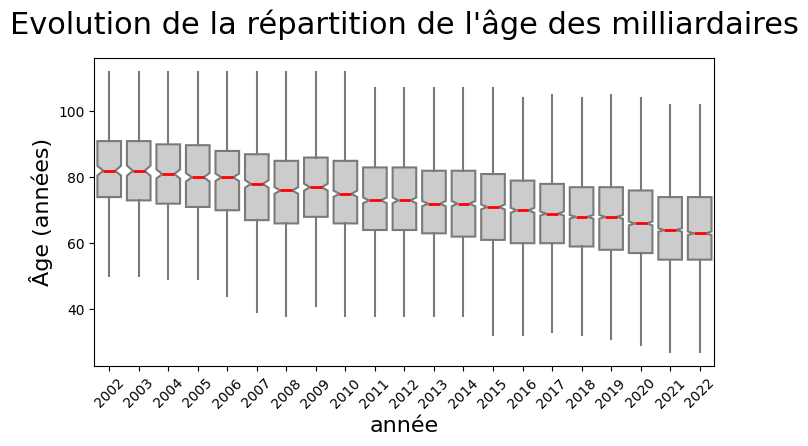

In [87]:
# how old are the rich?
# https://seaborn.pydata.org/generated/seaborn.boxplot.html

fig  = plt.figure(figsize=(8,4))

sns.boxplot(data=data, x='time', y='age',
            notch=True, showcaps=False,
            flierprops={"marker": "x"},    
            medianprops={"color": "r", "linewidth": 2},
            color=".8",
            showfliers=False)

plt.xticks(rotation=45)
plt.xlabel("année", size=16)
plt.ylabel("Âge (années)", size=16)
plt.title("Evolution de la répartition de l'âge des milliardaires", y=1.05, size=22)
plt.show()

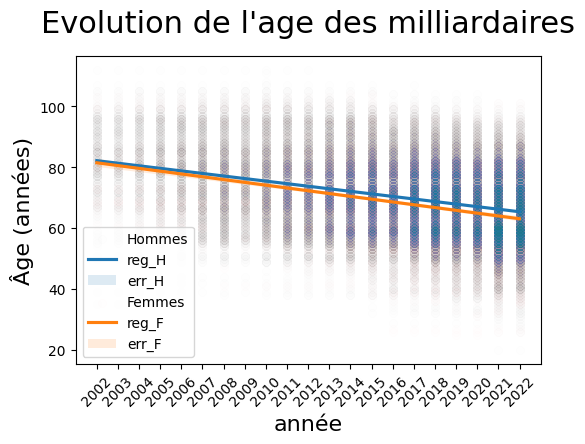

In [88]:
# regression linéaire 
plt.figure(figsize=(6,4))
handle = data.loc[data.gender =='M']
sns.regplot(x=handle.time,y=handle.age,scatter_kws={'alpha':0.005})
handle = data.loc[data.gender =='F']
sns.regplot(x=handle.time,y=handle.age,scatter_kws={'alpha':0.005})
plt.legend(['Hommes',"reg_H","err_H","Femmes","reg_F","err_F"], loc="lower left")
plt.title("Evolution de l'age des milliardaires", size=22, y=1.05)
plt.xticks(data.time.unique(), rotation=45)
plt.xlabel("année", size=16)
plt.ylabel("Âge (années)", size=16)
plt.show()

<Axes: xlabel='time', ylabel='age'>

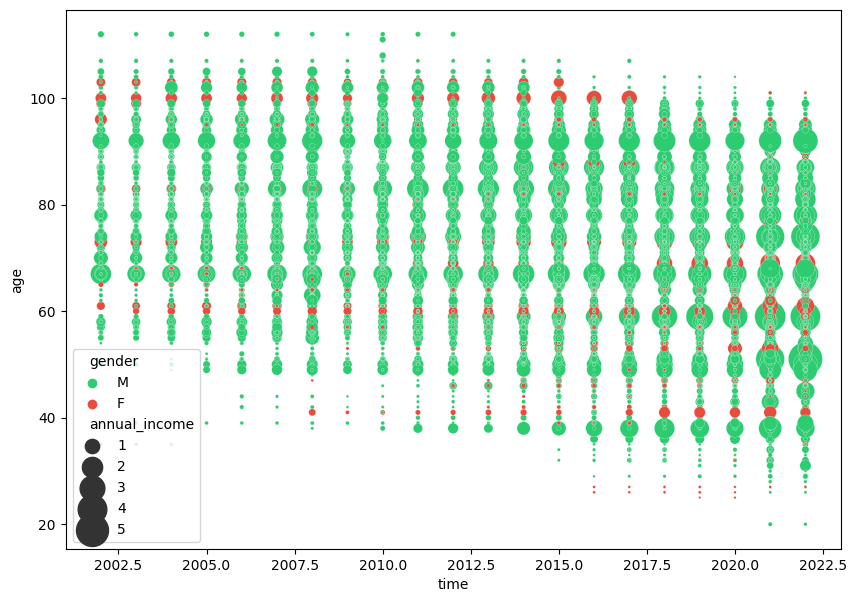

In [89]:
# afficher 3 variables et 1 variable categorielle
to_plot = data.loc[data.gender != 'M;F']

plt.figure(figsize=(10, 7))
sns.scatterplot(x="time", y="age", hue='gender', size="annual_income",
                palette=sns.color_palette(["#2ecc71", "#e74c3c"]),
                sizes=(2, 600), data=to_plot)

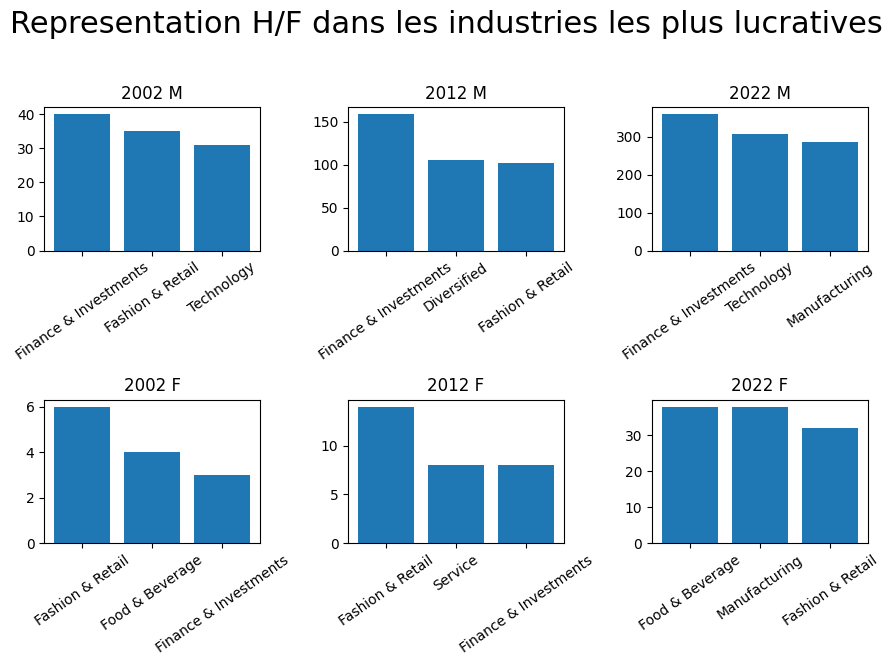

In [90]:
#REMOVE WARNINGS
import warnings
warnings.filterwarnings("ignore")

# Industries preferencielles pou H/F?
fig, ax = plt.subplots(2,3, figsize=(9,6))
j=0
for year in [2002,2012,2022]:
    to_plot = data.loc[data.time == year]
    i=0
    for gend in ['M','F']:
        to_plot_2 = to_plot.loc[to_plot.gender == gend]

        if not to_plot_2.empty:
            to_plot_final = to_plot_2.groupby('main_industry')['gender'].count().sort_values(ascending=False)[:3]
            ax[i,j].bar(x=to_plot_final.index,height=to_plot_final.values)

            title = str(year)+" "+gend
            ax[i,j].set_title(title)
            ax[i,j].set_xticklabels(labels=to_plot_final.index,rotation=35)
        i=1
    plt.xlabel("")
    j+=1    
plt.tight_layout() 
plt.suptitle("Representation H/F dans les industries les plus lucratives", y=1.1, size=22)
plt.show()


In [91]:
# who are the richest in the last year?

rich_2022 = data.loc[data.time == 2022, ['name_cleaned','annual_income']]
rich_2022 = rich_2022.sort_values(by='annual_income', ascending=False)[:5]
rich_2022 = rich_2022.name_cleaned.values

to_plot = data.loc[data.name_cleaned.isin(rich_2022)]  # only 10 richest of 2022
display(to_plot[['name_cleaned','time','annual_income']].sample(3))

,name_cleaned,time,annual_income
333716,Warren_buffett,2012,1.37280
38686,Bernard_arnault,2006,0.73659
333506,Warren_buffett,2002,1.40385


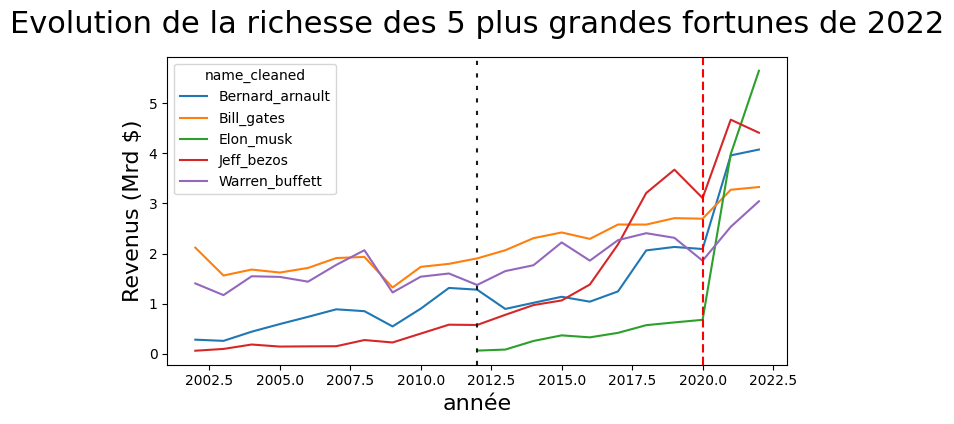

In [93]:
# Evolution revenus des 5 plus riches en 2022

fig = plt.figure(figsize=(8,4))
ax = sns.lineplot(data=to_plot, x='time', y='annual_income', hue='name_cleaned')
ax.axvline(2012, color=".1", dashes=(2, 4))
ax.axvline(2020, color="r", dashes=(4, 2))

plt.title("Evolution de la richesse des 5 plus grandes fortunes de 2022", y=1.05, size=22)
plt.xlabel("année", size=16)
plt.ylabel("Revenus (Mrd $)", size=16)

plt.show()